#Этап 1 - Анализ и предварительная обработка данных


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# загрузка датасета
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/smoke_detector_task.csv", sep=",", encoding="cp866", index_col = False)

In [ ]:
df = df.drop(labels='Unnamed: 0', axis=1)

In [ ]:
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,No
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,No
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,No
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,No
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,No
62626,1655130048,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,No
62627,1655130049,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,No
62628,1655130050,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,No


In [ ]:
# анализ данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62484 non-null  float64
 2   Humidity[%]     62383 non-null  float64
 3   TVOC[ppb]       62009 non-null  float64
 4   eCO2[ppm]       62305 non-null  float64
 5   Raw H2          62519 non-null  float64
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62603 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62313 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62378 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 7.2+ MB


In [ ]:
df.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,6.263000e+04,62484.000000,62383.000000,62009.000000,62305.000000,62519.000000,62630.000000,62603.000000,62630.000000,62313.000000,62630.000000,62378.000000,62630.000000,62630.000000
mean,1.654792e+09,15.972252,48.536969,1944.124030,670.574994,12942.383835,19754.257912,938.627644,100.594309,184.443467,491.463608,203.382660,80.049042,10511.386157
std,1.100025e+05,14.361206,8.868993,7819.668069,1909.675941,272.531480,609.513156,1.331169,922.524245,1976.590473,4265.661251,2214.719662,1083.383189,7597.870997
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,11.000500,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000
50%,1.654762e+09,20.130000,50.140000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.942000,0.044000,9336.000000
75%,1.654778e+09,25.410000,53.240000,1189.000000,438.000000,13108.000000,20078.000000,939.417000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000


<Axes: >

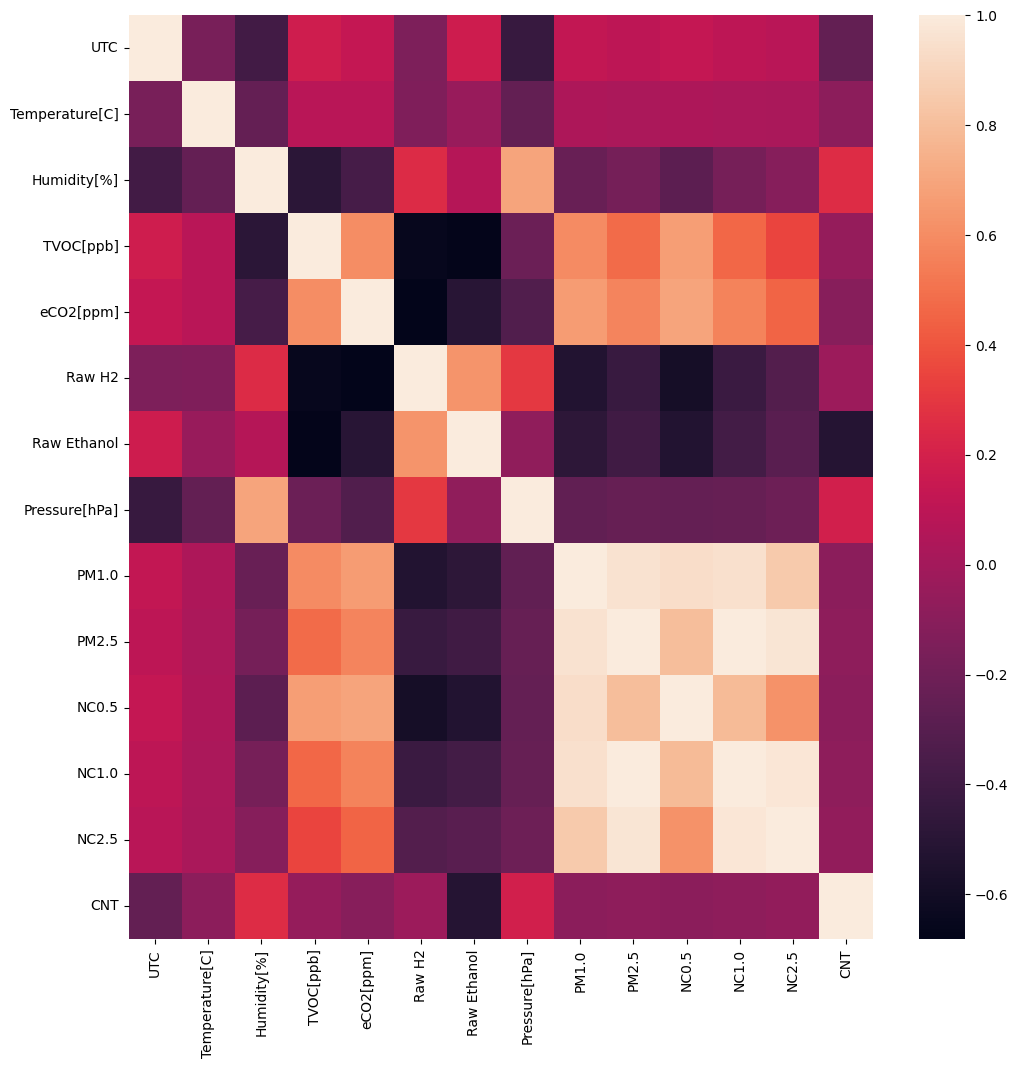

In [ ]:
# построение графика: тепловая карта
numeric_cols = df.columns[:-1]

df_numeric = df[numeric_cols].dropna()
ax, fig = plt.subplots(figsize=[12,12])
sns.heatmap(df_numeric.corr())

In [ ]:
# проверка признаков на наличие пропусков
df.isnull().sum()

UTC                 0
Temperature[C]    146
Humidity[%]       247
TVOC[ppb]         621
eCO2[ppm]         325
Raw H2            111
Raw Ethanol         0
Pressure[hPa]      27
PM1.0               0
PM2.5             317
NC0.5               0
NC1.0             252
NC2.5               0
CNT                 0
Fire Alarm          0
dtype: int64

In [ ]:
# заполнение пропусков вещественных признаков средним значением по столбцам
df[numeric_cols] = df[numeric_cols].transform(lambda x: x.fillna(x.mean()))
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,No
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,No
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,No
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,No
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,No
62626,1655130048,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,No
62627,1655130049,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,No
62628,1655130050,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,No


In [ ]:
# обработка булевой колонки (Fire Alarm)
def prepare_bool_cols(df, cols):
  map_bool_cols = {
      'NO': 0,
      'YES': 1,
      'no': 0,
      'yes': 1,
      'No': 0,
      'Yes': 1,
      pd.NA: pd.NA,
  }
  for col in cols:
    mode = df[col].map(map_bool_cols).mode()[0]
    df[col] = df[col].map(map_bool_cols)
    df[col].fillna(mode, inplace=True)
    df[col] = df[col].astype('uint8')
  return df

In [ ]:
df = prepare_bool_cols(df, ['Fire Alarm'])
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [ ]:
# Проверка того, что все пропуски заполнены и все признаки являются числовыми
df.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  float64
 4   eCO2[ppm]       62630 non-null  float64
 5   Raw H2          62630 non-null  float64
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  uint8  
dtypes: float64(11), int64(3), uint8(1)
memory usage: 6.7 MB


In [ ]:
# сохранение датасета
df.to_csv("/content/drive/MyDrive/datasets/smoke_detector_task_modified.csv", encoding="utf-8", sep=';', index=False)

#Этап 2 - Моделирование (Обучение и оценивание моделей)

Загрузка обработанного датасета (Который был обработан на первом этапе)

In [ ]:
df_m = pd.read_csv("/content/drive/MyDrive/datasets/smoke_detector_task_modified.csv", sep=";", encoding="cp866", index_col = False)

In [ ]:
df_m.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


Дальше выделим целевоой признак (y) и признаки, по которым будем предсказывать целевой признак (Х).

In [ ]:
X = df_m.drop(columns = ['Fire Alarm'])
X

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,1655130048,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,1655130049,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,1655130050,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [ ]:
y = df_m['Fire Alarm']
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire Alarm, Length: 62630, dtype: int64

Разобью данных на обучающую и тестирующую выборки.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Произведем масштабирование данных.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

И теперь начнем обучать модели. Для себя напомню и зафиксирую, что сейчас решается задача классификации, по которой определяется, сработает датчик дыма или нет. Датасет состоит из 15 столбцов: 14 признаков для предсказывания и, соответственно, 1 целевой признак.

Необходимо обучить следующие модели (с подбором для каждого из них гиперпараметра\ов):
- KNN
- LogisticRegression
- DecisionTreeClassifier
- BaggingClassifier
- Полносвязная нейронная сеть

Каждую модель буду оценивать при помощи метрик:
- confusion matrix
- classification report



Начну с модели KNN.

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

knn = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1).fit(X_train, y_train) # cv=3, n_jobs=-1

print(knn.best_params_, '\n')
print(classification_report(y_test, knn.predict(X_test)), '\n')
print(confusion_matrix(y_test, knn.predict(X_test)))

{'n_neighbors': 1} 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526
 

[[3573    2]
 [   5 8946]]


~~У меня большие сомнения, что это нармально. Из 12 тысяч всего 4 ошибки. Слишком хорошо. Страшно.~~


Теперь обучим модель Логистической регресии.

In [ ]:
param_grid = {'C' : list(range(10, 500, 10))}

lr = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear'), param_grid, n_jobs=-1).fit(X_train, y_train)

print(lr.best_params_, '\n')
print(classification_report(y_test, lr.predict(X_test)), '\n')
print(confusion_matrix(y_test, lr.predict(X_test)))

{'C': 440} 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3575
           1       0.99      0.99      0.99      8951

    accuracy                           0.99     12526
   macro avg       0.99      0.99      0.99     12526
weighted avg       0.99      0.99      0.99     12526
 

[[3512   63]
 [  74 8877]]


Теперь обучим модель DecisionTreeClassifier

In [ ]:
param_grid = {'max_depth': list(range(1, 12)),
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [1, 2, 3, 4]}

dtс = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1).fit(X_train, y_train)

print(dtс.best_params_, '\n')
print(classification_report(y_test, dtс.predict(X_test)), '\n')
print(confusion_matrix(y_test, dtс.predict(X_test)))

{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 3} 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526
 

[[3575    0]
 [   1 8950]]


~~Ладно, ладно. После дерева, которое справилось лучше чем KNN, сомнения сильно поугасли. Это хорошо.~~

Обучим модель BaggingClassifier.

In [ ]:
param_grid = {'max_samples': [0.05, 0.1, 0.2, 0.5],
              'max_features': [0.3, 0.5, 0.7, 0.9]}

bag = GridSearchCV(BaggingClassifier(), param_grid, n_jobs=-1).fit(X_train, y_train)

print(bag.best_params_, '\n')
print(classification_report(y_test, bag.predict(X_test)))
print(confusion_matrix(y_test, bag.predict(X_test)))

{'max_features': 0.5, 'max_samples': 0.5} 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

[[3574    1]
 [   1 8950]]


И последняя модель, Полносвязная нейроная сеть.

In [ ]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier

def build_clf():
    ann = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(units=64, activation="relu", input_shape=(14,)),
            tf.keras.layers.Dense(units=128, activation="relu"),
            tf.keras.layers.Dropout(0.05),
            tf.keras.layers.Dense(units=64, activation="relu"),
            tf.keras.layers.Dense(units=32, activation="relu"),
            tf.keras.layers.Dense(units=16, activation="relu"),
            tf.keras.layers.Dense(units=1, activation="sigmoid"),
        ]
    )
    ann.compile(optimizer='adam',
                loss="binary_crossentropy",
                metrics = ['accuracy'])
    return ann


model=KerasClassifier(build_fn=build_clf)

param_grid = {'batch_size':[200, 150, 100, 50, 25],
              'nb_epoch':[40, 70, 100, 150, 200],
              }

gs=GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_params_, '\n')
print(gs.best_score_, '\n')

y_pred = np.around(gs.predict(X_test))
print(classification_report(y_test, y_pred), '\n')
print(confusion_matrix(y_test, y_pred))


<ipython-input-17-761fb108dd57>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=build_clf)
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


335/335 [==============================] - 3s 4ms/step - loss: 0.0513 - accuracy: 0.9886
{'batch_size': 150, 'nb_epoch': 100} 

0.9993214190006257 

392/392 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526
 

[[3570    5]
 [   3 8948]]


Теперь, после обучения всех моделей, пора оценить лучшую модель из них. Если смотреть по метрике classification report, то нам подойдут все модели, кроме логистической регресии (показатели F1 у всех моделей кроме логистической регресии равны 1). В таком случае, для определения лучшей модели, можно обратиться к метрике confusion matrix. Лучший результат показал DecisionTreeClassifier (классификатор на основе дерева решений).

Его и сохраню.

In [ ]:
import pickle

In [ ]:
# (V)
pickle.dump(dtс, open('/content/drive/MyDrive/models/Decision_Tree_Classifier.pkl', 'wb'))

#Этап 3 - Инференс (создание дашборда с использованием выбранной модели)

Так как модель уже сериализована (это было сделанно в прошлом пункте), то пропускаем этот пункт и идем дальше.

Теперь подготовим данные и модель для последющей работы с ними

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# путь до файла с предобработанными данными в формате csv
data_path = "https://drive.google.com/file/d/1B5mRfnTJn7BfVSTtgGAUzVDbWkzYo8p4/view?usp=share_link"

# путь до файла с сериализованной моделью
model_path = "https://drive.google.com/file/d/1-6B8biGOBgsKi0scymK90uS30J4s7ApD/view?usp=share_link"

In [ ]:
import os


id_slice = slice(32, 65)

data_file_id = data_path[id_slice]
model_file_id = model_path[id_slice]

os.system(f"wget -q -O preprocessed_data.csv https://drive.google.com/uc?id={data_file_id}")
os.system(f"wget -q -O model.pkl https://drive.google.com/uc?id={model_file_id}")

0

Теперь в нашем окружении есть два файла:

- `preprocessed_data.csv` -- файл с подготовленными данными
- `model.pkl` -- файл с сериализованной моделью

Теперь, когда данные готовы, можно начать писать приложение.

In [ ]:
!pip install -q numpy pandas scikit-learn streamlit

In [ ]:
%%writefile app.py
import pickle

import pandas as pd
import numpy as np
import streamlit as st
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


def main():
    model = load_model("model.pkl")
    test_data = load_test_data("preprocessed_data.csv")

    page = st.sidebar.selectbox(
        "Выберите страницу",
        ["Описание задачи и данных", "Запрос к модели"]
    )



    if page == "Описание задачи и данных": # (V)
        st.title("Описание задачи и данных")
        st.write("Для выбора другой страницы выберите другую страницу слева")

        st.header("Описание задачи")
        st.markdown("""
        Данный датасет содержит в себе характеристики, связанные с возникновением пожаров и отображающие реальные показатели детектеров дыма.
        Данные датасет используется для разработки устройств обнаружения дыма и определения, возник пожар или нет, на основе искусственного интеллекта.
        Объем набора данных составляет почти 60 000 показаний.
        Чтобы отслеживать данные, к каждому показанию датчика добавляется временная метка UTC.""")

        st.header("Описание данных")
        st.markdown("""Предоставленные данные:
* UTC – Временная метка в секундах UTC,
* Temperature – Температура воздуха, измеряемая в градусах Цельсия,
* Humidity – Влажность воздуха,
* TVOC – Общее количество летучих органических соединений; измеряется в ppb (частях на миллиард),
* eCo2 – эквивалентная концентрация CO2; рассчитывается на основе различных значений, таких как TVCO,
* Raw H2 – необработанный молекулярный водород; не компенсирован (смещение, температура и т.д.),
* Raw Ethanol – сырой этанольный газ,
* Pressure – Давление воздуха,
* PM1.0 – Твердые частицы диаметром менее 1,0 микрометра,
* PM2.5 – Твердые частицы диаметром менее 2,5 микрометра,
* NC0.5 – Концентрация твердых частиц диаметром менее 0,5 микрометра.
* NC1.0 - Концентрация твердых частиц диаметром менее 1,0 микрометра
* NC2.5 - Концентрация твердых частиц диаметром менее 2,5 микрометров
* CNT - Простой подсчет
* Fire Alarm - (реальное значение) 1 при пожаре и 0 при пожаре""")




    elif page == "Запрос к модели":
        st.title("Запрос к модели")
        st.write("Для выбора другой страницы выберите другую страницу слева")
        request = st.selectbox(
            "Выберите запрос",
            ["матрица путаницы", "5 первых предсказанных значений", "Исходная таблица", "Пользовательский пример"]
        )

        if request == "матрица путаницы": # (V)
            st.header("матрица путаницы")
            X_pain = test_data.drop(columns = ['Fire Alarm'])
            y_pain = test_data['Fire Alarm']
            X_pain = StandardScaler().fit_transform(X_pain)
            matrix = confusion_matrix(y_pain, model.predict(X_pain))
            st.write(matrix)

        elif request == "5 первых предсказанных значений": # (V)
            st.header("5 предсказанных значений")
            X_pain = test_data.drop(columns = ['Fire Alarm'])
            y_pain = test_data['Fire Alarm']
            X_pain = StandardScaler().fit_transform(X_pain)
            first_5_test = X_pain[:5][:]
            first_5_pred = model.predict(first_5_test)
            for item in first_5_pred:
                st.write(f"{item:.2f}")

        elif request == "Пользовательский пример": #(V)
            st.header("Пользовательский пример")

            utc = st.number_input("Введите характеристику UTC (рекомендуется ввести значение в промежутке [-0.73, 3.07])")

            temperature = st.number_input("Введите характеристику Temperature (рекомендуется ввести значение в промежутке [-2.65, 3.06])")

            humidity = st.number_input("Введите характеристику Humidity (рекомендуется ввести значение в промежутке [-4.27, 3.01])")

            TVOC = st.number_input("Введите характеристику TVOC (рекомендуется ввести значение в промежутке [-0.25, 7.46])")

            eCO2 = st.number_input("Введите характеристику eCO2 (рекомендуется ввести значение в промежутке [-0.14, 31.15])")

            Raw_H2 = st.number_input("Введите характеристику Raw H2 (рекомендуется ввести значение в промежутке [-8.35, 3.16])")

            Raw_Ethanol = st.number_input("Введите характеристику Raw Ethanol (рекомендуется ввести значение в промежутке [-7.28, 2.72])")

            Pressure = st.number_input("Введите характеристику Pressure (рекомендуется ввести значение в промежутке [-5.84, 0.93])")

            PM1_0 = st.number_input("Введите характеристику PM1.0 (рекомендуется ввести значение в промежутке [-0.11, 15.43])")

            PM2_5 = st.number_input("Введите характеристику PM2.5 (рекомендуется ввести значение в промежутке [-0.09, 22.95])")

            NC0_5 = st.number_input("Введите характеристику NC0.5 (рекомендуется ввести значение в промежутке [-0.12, 14.30])")

            NC1_0 = st.number_input("Введите характеристику NC1.0 (рекомендуется ввести значение в промежутке [-0.09, 23.40])")

            NC2_5 = st.number_input("Введите характеристику NC2.5 (рекомендуется ввести значение в промежутке [-0.07, 27.64])")

            CNT = st.number_input("Введите характеристику CNT (рекомендуется ввести значение в промежутке [-1.38, 1.91])")

            if st.button('Предсказать'):
                data = [utc, temperature, humidity, TVOC, eCO2, Raw_H2, Raw_Ethanol, Pressure, PM1_0, PM2_5, NC0_5, NC1_0, NC2_5, CNT]
                data = np.array(data).reshape((1, -1))
                pred = model.predict(data)
                st.write(f"Предсказанное значение: {pred[0]:.2f}")
            else:
                pass

        elif request == "Исходная таблица": # (V)
            st.header("Вывод данных")
            st.write("Вывод первых 10 строк исходного датасета")
            st.write(test_data.head(10))


@st.cache_data
def load_model(path_to_file):
    with open(path_to_file, 'rb') as model_file:
        model = pickle.load(model_file)
    return model


@st.cache_data
def load_test_data(path_to_file):
    df = pd.read_csv(path_to_file, sep=";")
    return df


if __name__ == "__main__":
    main()


Overwriting app.py


### Запуск приложения

Теперь запустим приложение

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.518s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.116s
your url is: https://metal-crews-pull-35-194-65-28.loca.lt
^C


Ссылка на github с приложением app.py

https://github.com/VRV12/TAD_Vekselman

Прошу прощения за задержку этого задания